In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, jika dataset Anda berupa file CSV
dataset_path = '/content/drive/MyDrive/GIGIH/Data Analyst Task/Dataset/backloggd_games.csv'
df = pd.read_csv(dataset_path)

df.head(2)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K


### **Check dan Treat Null Values**

---


In [ ]:
# Check for null values
null_counts = df.isnull().sum()

# Treat null values (jika diperlukan)
# Contoh: Mengisi nilai null dengan nilai rata-rata kolom
# Check dan Treat Null Values
df.fillna(df.mean(numeric_only=True), inplace=True)
print('Berhasil')

Berhasil


### **Check dan Treat Duplicate Data**

---



In [ ]:
# Check for duplicate data
duplicate_counts = df.duplicated().sum()

# Treat duplicate data (jika diperlukan)
df.drop_duplicates(inplace=True)
print('Berhasil')

Berhasil


### **Show Data That Has Been Checked**

---



In [ ]:
df.head(5)

,Unnamed: 0,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,0,Elden Ring,"Feb 25, 2022","['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,1,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,2,Hades,"Dec 07, 2018",['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,3,Hollow Knight,"Feb 24, 2017",['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,4,Undertale,"Sep 15, 2015","['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


### **1. Exploring Number of Games Released per-Year**

---



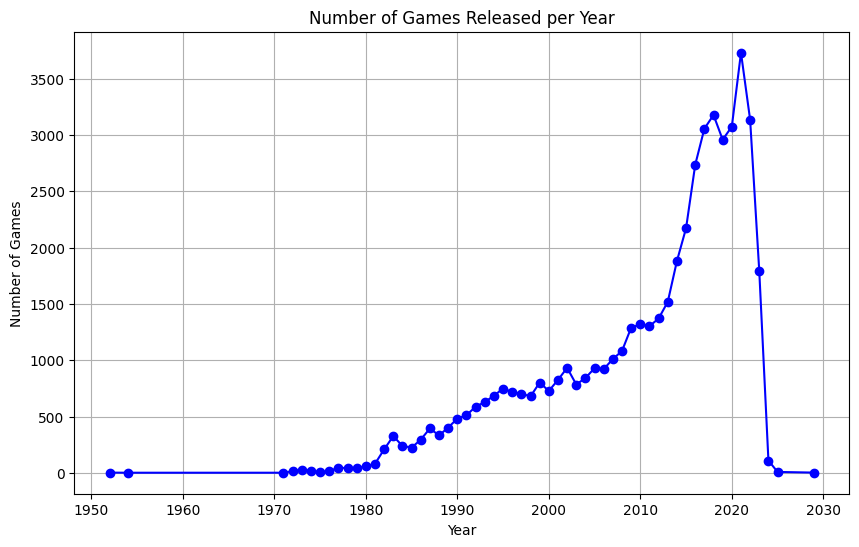

In [ ]:
# Mengganti nilai 'TBD' dengan pd.NaT (Not a Time)
df['Release_Date'] = df['Release_Date'].replace('TBD', pd.NaT)

# Mengubah format Release_Date menjadi tahun
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Jumlah permainan yang dirilis setiap tahun
game_per_year = df['Year'].value_counts().sort_index()

# Membuat grafik garis untuk menampilkan jumlah permainan yang dirilis setiap tahun
plt.figure(figsize=(10, 6))
game_per_year.plot(kind='line', marker='o', color='b')
plt.title("Number of Games Released per Year")
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()


### **2. Top 10 Developers Games based on Plays**

---



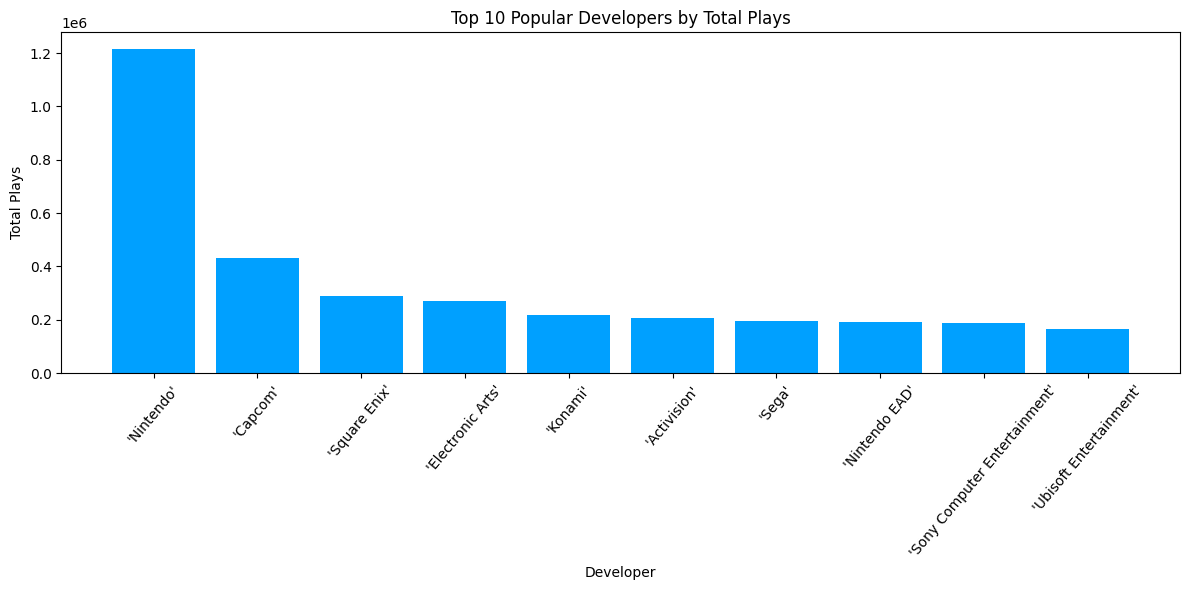

In [ ]:
# Fungsi untuk mengubah 'Plays' dari string menjadi nilai numerik
def plays_to_numeric(play_str):
    if isinstance(play_str, str):
        if 'K' in play_str:
            return float(play_str.replace('K', '')) * 1000
        elif 'M' in play_str:
            return float(play_str.replace('M', '')) * 1000000
        else:
            return float(play_str)
    else:
        return play_str

# Mengubah 'Plays' dari string menjadi nilai numerik
df['Plays'] = df['Plays'].apply(plays_to_numeric)

# Membuat kolom baru 'Developer' dari 'Developers'
df['Developer'] = df['Developers'].str.split(', ').str.get(0)
df['Developer'] = df['Developer'].str.replace('[', '', regex=False)
df['Developer'] = df['Developer'].str.replace(']', '', regex=False)
df = df[df['Developer'] != '']

# Menghitung total plays untuk setiap developer
popularity = df.groupby('Developer')['Plays'].sum()

# Mengurutkan developer berdasarkan total plays secara menurun
popularity = popularity.sort_values(ascending=False)

# Mengambil 10 developer teratas
top_10_popular = popularity.head(10)

# Membuat grafik batang untuk menampilkan top 10 developer berdasarkan total plays
plt.figure(figsize=(12, 6))
plt.bar(top_10_popular.index, top_10_popular.values, color='#00A0FF')
plt.title('Top 10 Popular Developers by Total Plays')
plt.xlabel('Developer')
plt.ylabel('Total Plays')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


### **3. Top 10 Genre Games**

---



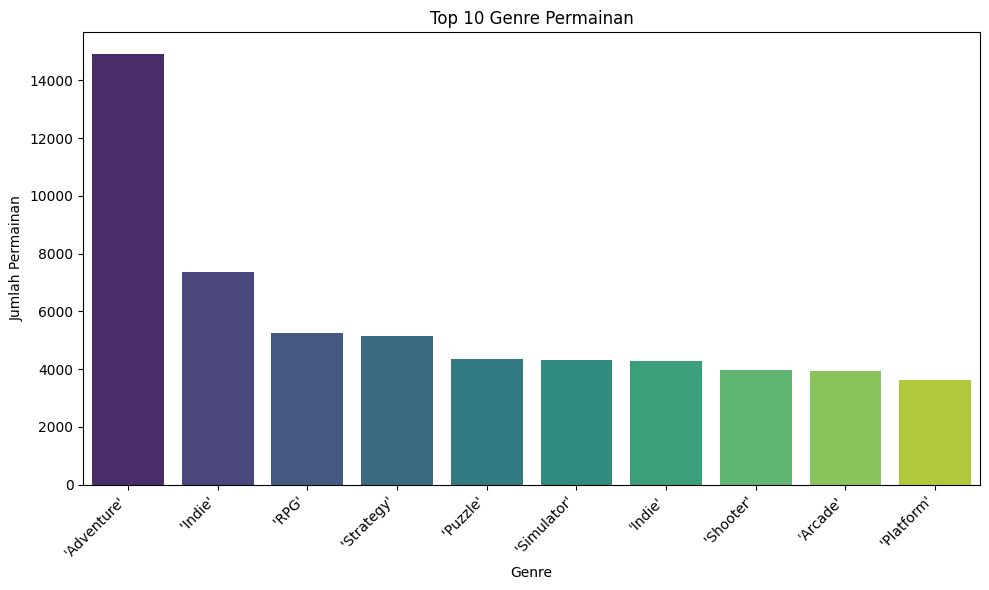

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung frekuensi masing-masing genre
genre_counts = df['Genres'].explode().value_counts()

# Memilih 10 genre teratas
top_10_genre = genre_counts.head(10)

# Membuat grafik bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genre.index, y=top_10_genre.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Jumlah Permainan')
plt.title('Top 10 Genre Permainan')
plt.tight_layout()
plt.show()


### **4. Rating Game Berdasarkan Developer**

---



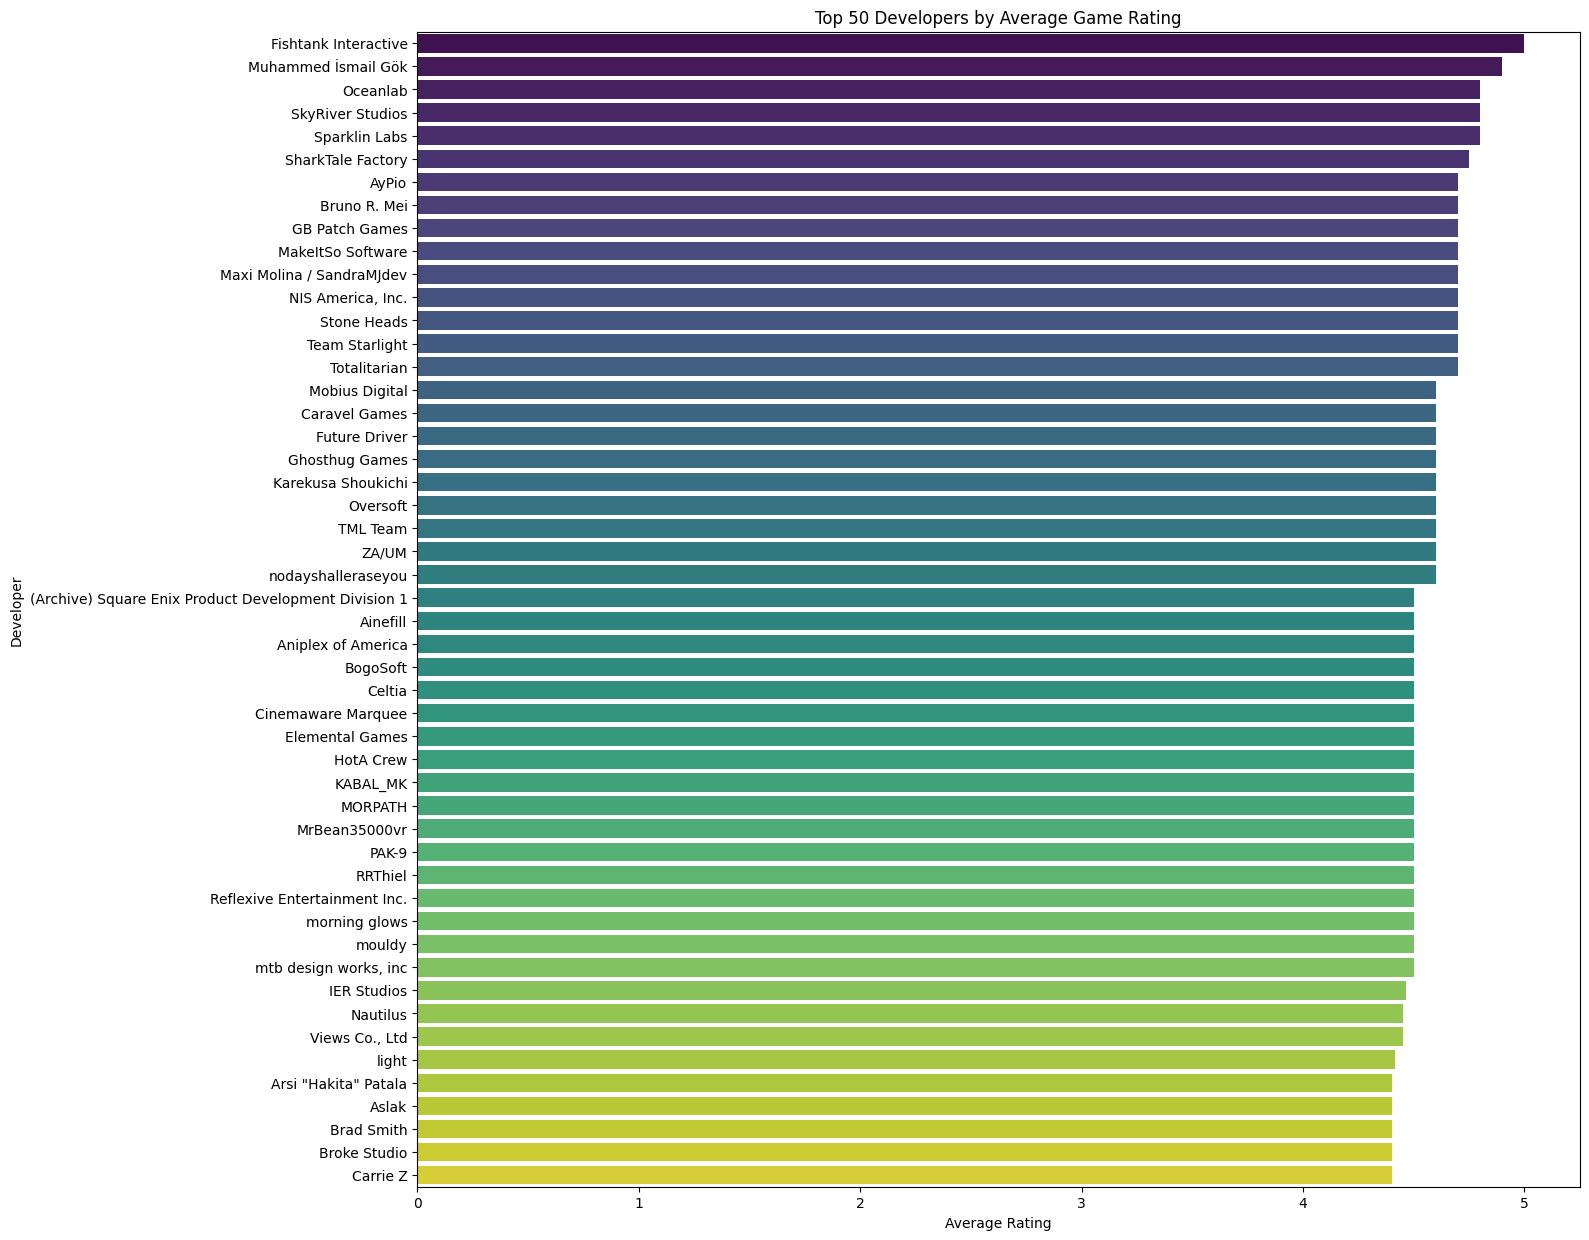

In [ ]:
df['Developers'] = df['Developers'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Mengeksplorasi data Developers
df_explode = df.explode('Developers')

# Menghitung rata-rata rating game berdasarkan developer
developer_ratings = df_explode.groupby('Developers')['Rating'].mean()

# Menemukan top 50 developer berdasarkan rata-rata rating
top_developers = developer_ratings.nlargest(50)

plt.figure(figsize=(15, 15))
sns.barplot(y=top_developers.index, x=top_developers.values, palette='viridis')
plt.title('Top 50 Developers by Average Game Rating')
plt.xlabel('Average Rating')
plt.ylabel('Developer')
plt.show()


### **5. Average Number of Players By Genre**

---



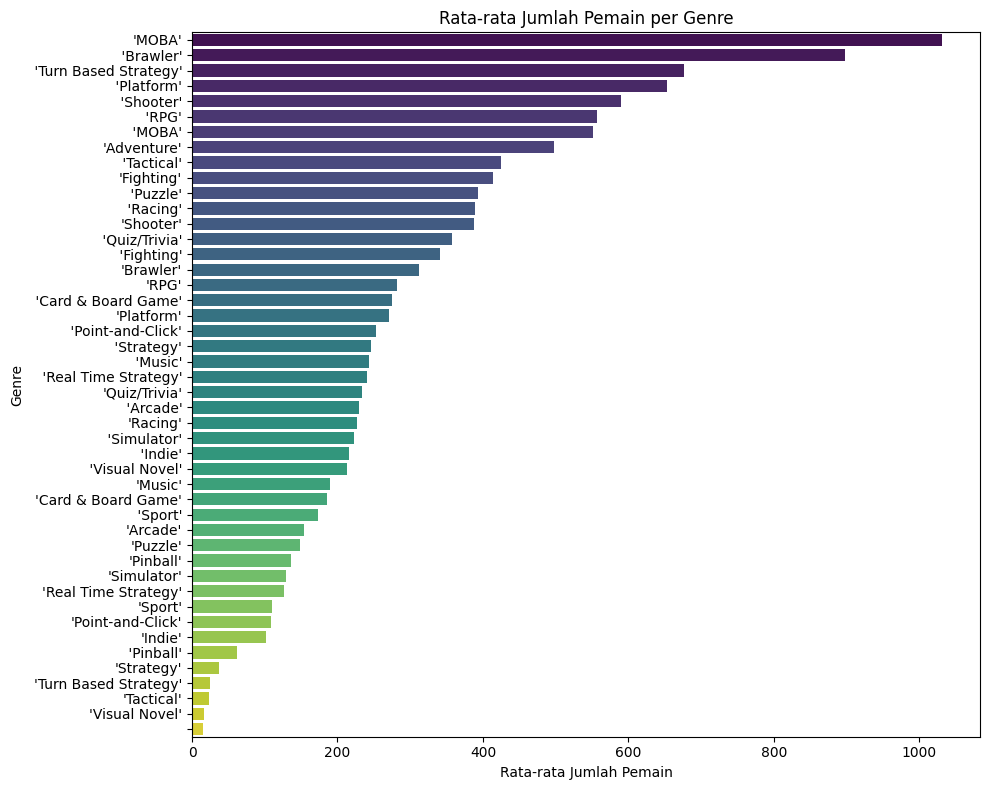

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Genres'] = df['Genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Mengeksplorasi data Genres
genres_df = df.explode('Genres')

# Menghitung rata-rata jumlah pemain berdasarkan genre
average_plays_by_genre = genres_df.groupby('Genres')['Plays'].mean()

# Mengurutkan hasil berdasarkan rata-rata jumlah pemain
genre_plays = average_plays_by_genre.sort_values(ascending=False)

# Membuat grafik bar chart dengan menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_plays.values, y=genre_plays.index, palette='viridis')
plt.xlabel('Rata-rata Jumlah Pemain')
plt.ylabel('Genre')
plt.title('Rata-rata Jumlah Pemain per Genre')
plt.tight_layout()
plt.show()


In [ ]:
# Convert TO HTML
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html test.ipynb

[NbConvertApp] Converting notebook test.ipynb to html
[NbConvertApp] Writing 1056651 bytes to test.html
